# Tutorial 3c - Chromatic Aberrations

### June 2024

This tutorial demonstrates how to assess chromatic aberrations in Optiland. We will first investigate a singlet with poor color correction, and then a well-corrected achromatic doublet.

In [1]:
import numpy as np

from optiland import analysis, optic

Let's define a simple singlet using a material with high dispersion:

In [2]:
class Singlet(optic.Optic):
    """Simple Singlet"""

    def __init__(self):
        super().__init__()

        # add surfaces
        self.add_surface(index=0, radius=np.inf, thickness=np.inf)
        self.add_surface(
            index=1,
            thickness=0.5,
            radius=32.2526,
            is_stop=True,
            material="N-SF6",
        )
        self.add_surface(index=2, thickness=19.8532, radius=-31.9756)
        self.add_surface(index=3)

        # add aperture
        self.set_aperture(aperture_type="EPD", value=3.4)

        # add field
        self.set_field_type(field_type="angle")
        self.add_field(y=0.0)

        # add wavelength
        self.add_wavelength(value=0.48613270)
        self.add_wavelength(value=0.58756180, is_primary=True)
        self.add_wavelength(value=0.65627250)

        self.update_paraxial()

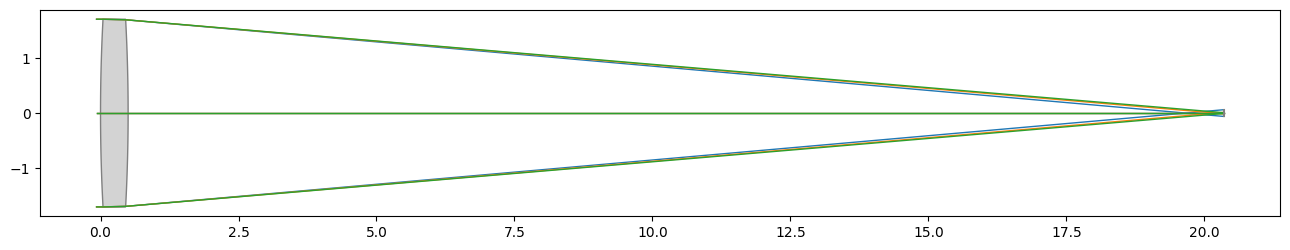

In [3]:
singlet = Singlet()
singlet.draw(
    wavelengths=[0.48613270, 0.587561806, 0.65627250],
    figsize=(16, 4),
    num_rays=3,
)

As can be seen in the visualization, the wavelengths of light focus at different points on the optical axis (zooming in can also help to see this more clearly). To quantify this, let's compute the first-order longitudinal axial color:

In [4]:
print(f"First-order Longitudinal Color: {np.sum(singlet.aberrations.LchC()):.3f}")

First-order Longitudinal Color: -0.789


This can also be seen in ray aberration plots. The slope of the tranverse errors at the $P_x=0$ and $P_y=0$ locations vary with wavelength. This indicates that the defocus differs as a function of wavelength.

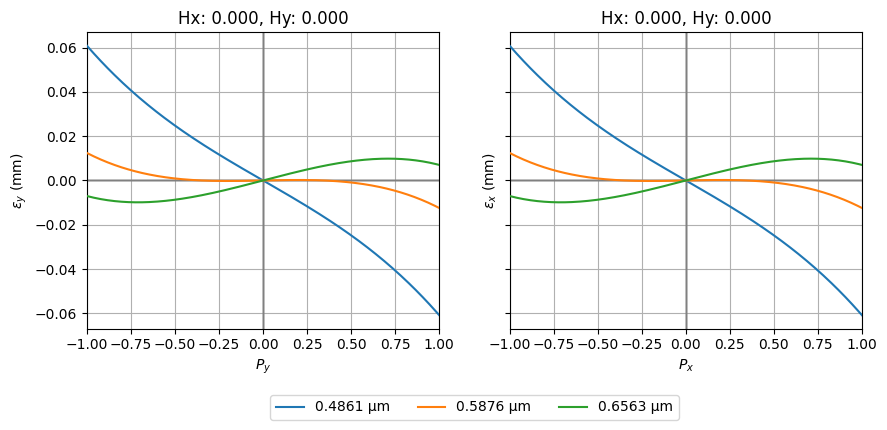

In [5]:
fan = analysis.RayFan(singlet)
fan.view()

Now, let's define an achromatic doublet, which improves the chromatic aberration performance in comparison to our simple singlet:

In [6]:
class Doublet(optic.Optic):
    """Achromatic Doublet

    Milton Laikin, Lens Design, 4th ed., CRC Press, 2007, p. 45
    """

    def __init__(self):
        super().__init__()

        # add surfaces
        self.add_surface(index=0, radius=np.inf, thickness=np.inf)
        self.add_surface(
            index=1,
            radius=12.38401,
            thickness=0.4340,
            is_stop=True,
            material="N-BAK1",
        )
        self.add_surface(
            index=2,
            radius=-7.94140,
            thickness=0.3210,
            material=("SF2", "schott"),
        )
        self.add_surface(index=3, radius=-48.44396, thickness=19.6059)
        self.add_surface(index=4)

        # add aperture
        self.set_aperture(aperture_type="EPD", value=3.4)

        # add field
        self.set_field_type(field_type="angle")
        self.add_field(y=0)

        # add wavelength
        self.add_wavelength(value=0.48613270)
        self.add_wavelength(value=0.58756180, is_primary=True)
        self.add_wavelength(value=0.65627250)

        self.update_paraxial()

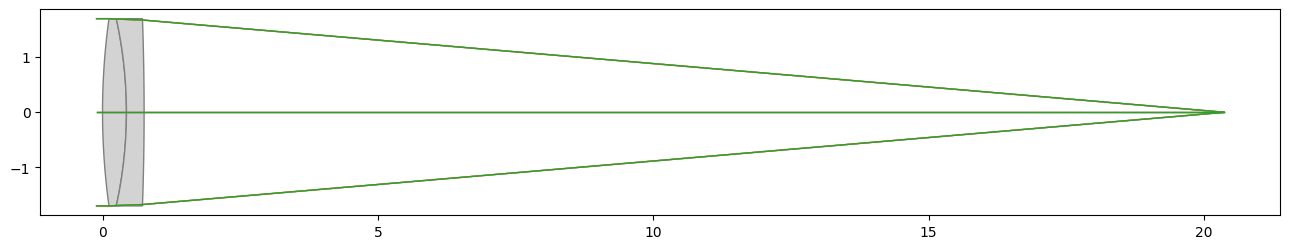

In [7]:
doublet = Doublet()
doublet.draw(
    wavelengths=[0.48613270, 0.587561806, 0.65627250],
    figsize=(16, 4),
    num_rays=3,
)

We can already see that the various wavelengths appear to focus at a similar location. Let's confirm that the longitudinal chromatic aberration has indeed been reduced by computing this directly and generating the tranverse ray aberrations plots.

In [8]:
print(f"First-order Longitudinal Color: {np.sum(doublet.aberrations.LchC()):.3f}")

First-order Longitudinal Color: -0.015


This value was -0.789 for the singlet and is now -0.015 for the doublet, which is a significant improvement. Now let's look at the tranverse ray aberration plots:

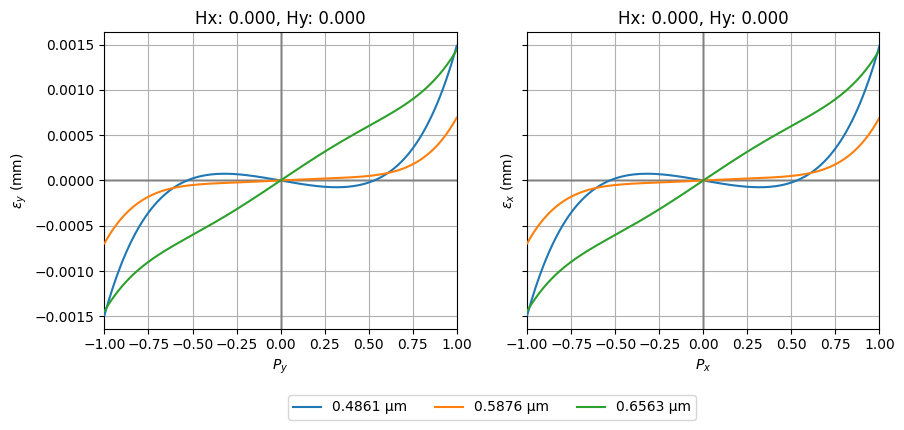

In [9]:
fan = analysis.RayFan(doublet)
fan.view()

Note that the y-axis scale of this plot is significantly smaller than that of the singlet. We can confirm that chromatic aberrations have been significantly reduced.